# Trabalho final - AED individual

## Importando pacotes e bibliotecas

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Importando a base de dados

### De .pkl

In [3]:
laptop_price = pd.read_pickle("../../datasets/processed/laptop_price.pkl")

## Informações básicas do dataframe

In [4]:
laptop_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1303 non-null   category
 1   product            1303 non-null   category
 2   typename           1303 non-null   category
 3   inches             1303 non-null   float32 
 4   screen_resolution  1303 non-null   category
 5   cpu_manufacturer   1303 non-null   category
 6   cpu                1303 non-null   category
 7   gpu_manufacturer   1303 non-null   category
 8   gpu                1303 non-null   category
 9   ram_gb             1303 non-null   uint8   
 10  type_storage       1303 non-null   category
 11  hdd_gb             1303 non-null   int16   
 12  ssd_gb             1303 non-null   int16   
 13  hybrid_gb          1303 non-null   int16   
 14  flash_storage_gb   1303 non-null   int16   
 15  opsys              1303 non-null   category
 16  weight

In [5]:
laptop_price.sample(10)

,company,product,typename,inches,screen_resolution,cpu_manufacturer,cpu,gpu_manufacturer,gpu,ram_gb,type_storage,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,opsys,weight_kg,price_euros
348,Asus,VivoBook Flip,2 in 1 Convertible,11.6,1366x768,Intel,Others Intel,Intel,Intel HD Graphics 500,4,flash storage,0,0,0,32,Windows,1.500,375.00
1132,Asus,L403NA-GA013TS (N3350/4GB/32GB/W10),Notebook,14.0,1366x768,Intel,Others Intel,Intel,Intel HD Graphics 500,4,flash storage,0,0,0,32,Windows,1.500,278.00
722,Lenovo,ThinkPad T470s,Ultrabook,14.0,1920x1080,Intel,Intel Core i5,Intel,Intel HD Graphics 620,8,ssd,0,256,0,0,Windows,1.320,1499.00
1023,HP,ProBook 440,Notebook,14.0,1920x1080,Intel,Intel Core i7,Nvidia,Nvidia GeForce 930MX,8,ssd,0,256,0,0,Windows,1.640,1185.43
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Intel Core i7,AMD,AMD Radeon R5 M330,6,hdd,1000,0,0,0,Windows,2.190,764.00
70,Microsoft,Surface Laptop,Ultrabook,13.5,2256x1504,Intel,Intel Core i5,Intel,Intel HD Graphics 620,4,ssd,0,128,0,0,Windows,1.252,1089.00
643,Asus,ROG GL553VE-FY022,Gaming,15.6,1920x1080,Intel,Intel Core i7,Nvidia,Nvidia GeForce GTX 1050 Ti,8,hdd,1000,0,0,0,Outros,2.500,1169.00
76,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,1920x1080,Intel,Intel Core i5,Intel,Intel HD Graphics 620,8,hdd,2000,0,0,0,Outros,2.200,519.00
1001,HP,ENVY -,Notebook,13.3,1920x1080,Intel,Intel Core i5,Intel,Intel HD Graphics 620,8,ssd,0,256,0,0,Windows,1.340,1189.00
982,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,1920x1080,AMD,Others AMD,AMD,AMD Radeon 530,6,ssd,0,256,0,0,Windows,2.200,549.00


In [19]:
laptop_price.describe()

,inches,ram_gb,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,weight_kg,price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017190,8.382195,413.783576,183.732924,8.831926,4.555641,2.038734,1123.686992
std,1.426304,5.084665,515.818779,186.966903,92.567185,30.274090,0.665475,699.009043
min,10.100000,2.000000,0.000000,0.000000,0.000000,0.000000,0.690000,174.000000
25%,14.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.500000,599.000000
50%,15.600000,8.000000,0.000000,256.000000,0.000000,0.000000,2.040000,977.000000
75%,15.600000,8.000000,1000.000000,256.000000,0.000000,0.000000,2.300000,1487.880000
max,18.400000,64.000000,2000.000000,1024.000000,1000.000000,512.000000,4.700000,6099.000000


## Tratamento de dados e normalizações

### Remoção de espaços em branco

In [6]:
# Não foi necessário!!!

### Passando os títulos para lowercase

In [7]:
# Não foi necessário!!!

### Demais tratamentos

#### Empresas vendedoras

In [8]:
companies = laptop_price.company.unique().copy()
i = int(1)

for actual_company in companies:
    print(f"Empresa {i}\t:\t{actual_company}")
    i = 1 + i

Empresa 1	:	Apple
Empresa 2	:	HP
Empresa 3	:	Acer
Empresa 4	:	Asus
Empresa 5	:	Dell
Empresa 6	:	Lenovo
Empresa 7	:	Chuwi
Empresa 8	:	MSI
Empresa 9	:	Microsoft
Empresa 10	:	Toshiba
Empresa 11	:	Huawei
Empresa 12	:	Xiaomi
Empresa 13	:	Vero
Empresa 14	:	Razer
Empresa 15	:	Mediacom
Empresa 16	:	Samsung
Empresa 17	:	Google
Empresa 18	:	Fujitsu
Empresa 19	:	LG


#### cpu

In [9]:
laptop_price.cpu.unique()

['Others Intel', 'Intel Core i5', 'Others AMD', 'Intel Core i7', 'Intel Core i3', 'AMD Ryzen', 'AMD FX', 'Samsung Cortex']
Categories (8, object): ['AMD FX', 'AMD Ryzen', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Others AMD', 'Others Intel', 'Samsung Cortex']

In [10]:
#laptop_price.cpu = laptop_price.cpu.replace(to_replace = ["Others Intel", "Intel Core i5", "Intel Core i7", "Intel Core i3"], value = "Intel", inplace = True)
#laptop_price.cpu = laptop_price.cpu.replace(to_replace = ["Others AMD", "AMD Ryzen", "AMD FX"], value = "AMD", inplace = True)
#laptop_price.cpu = laptop_price.cpu.replace("Samsung Cortex", "Other", inplace = True)
print(f"{laptop_price.cpu.unique()}")

['Others Intel', 'Intel Core i5', 'Others AMD', 'Intel Core i7', 'Intel Core i3', 'AMD Ryzen', 'AMD FX', 'Samsung Cortex']
Categories (8, object): ['AMD FX', 'AMD Ryzen', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Others AMD', 'Others Intel', 'Samsung Cortex']


In [11]:
laptop_price.sample(5)

,company,product,typename,inches,screen_resolution,cpu_manufacturer,cpu,gpu_manufacturer,gpu,ram_gb,type_storage,hdd_gb,ssd_gb,hybrid_gb,flash_storage_gb,opsys,weight_kg,price_euros
914,Acer,Aspire E5-575,Notebook,15.6,1920x1080,Intel,Intel Core i3,Intel,Intel HD Graphics 620,4,hdd,1000,0,0,0,Windows,2.40,499.0
868,Acer,TMX349-G2-M-50FS (i5-7200U/8GB/256GB/FHD/W10),Notebook,14.0,1920x1080,Intel,Intel Core i5,Intel,Intel HD Graphics 620,8,ssd,0,256,0,0,Windows,1.56,902.0
963,Toshiba,Portege X20W-D-10V,Ultrabook,12.5,1920x1080,Intel,Intel Core i7,Intel,Intel HD Graphics 620,8,ssd,0,512,0,0,Windows,1.10,1790.0
946,Dell,Latitude 7280,Ultrabook,12.5,1920x1080,Intel,Intel Core i5,Intel,Intel HD Graphics,8,ssd,0,256,0,0,Windows,1.36,1472.2
756,HP,15-cb003na (i5-7300HQ/8GB/1TB,Notebook,15.6,1920x1080,Intel,Intel Core i5,Nvidia,Nvidia GeForce GTX 1050,8,ssd + hdd,1000,128,0,0,Windows,2.20,1099.0


## Exploração de dados

### Bar

In [12]:
def make_bar_plot(data: any, x_axis: any, y_axis: any, x_ticket: any, y_ticket: any, rotation = 0) -> None:
    figure = plt.figure(figsize = (12, 6))
    plt.bar(x = x_axis,
            height= y_axis,
            data = data,
            color = "#A03312",
            width = 0.5
        )
    plt.xlabel(x_ticket, fontsize = 16)
    plt.ylabel(y_ticket, fontsize = 14)
    plt.xticks(rotation = rotation, size = 12)
    plt.yticks(size = 12)
    plt.title("Média dos preços")
    plt.show()

##### Preço por marca

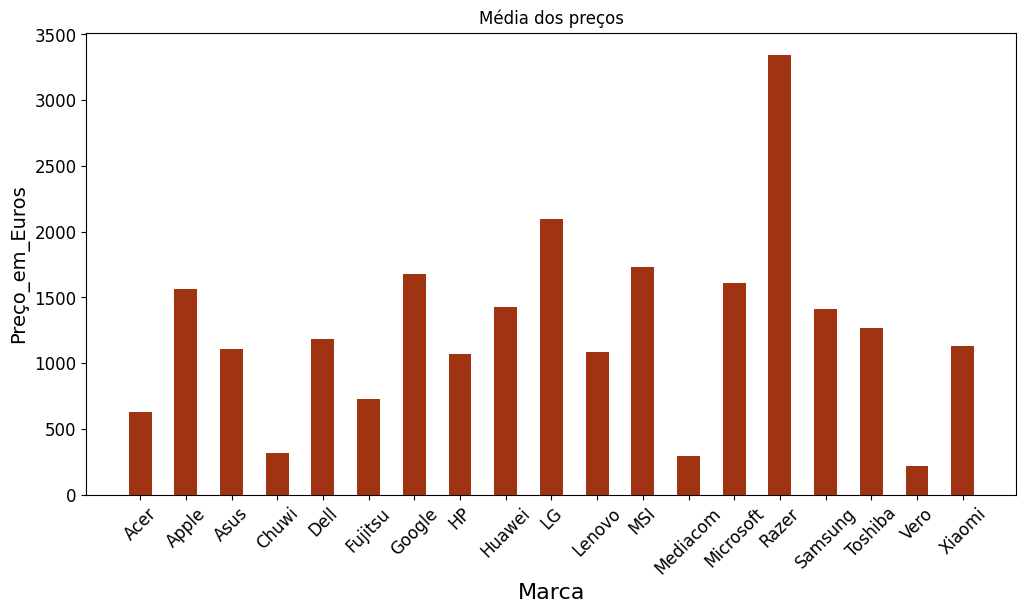

In [13]:
data = laptop_price.groupby(by = "company", as_index = False)["price_euros"].mean()
make_bar_plot(data, "company", "price_euros", "Marca", "Preço_em_Euros", 45)

##### Preço por cpu

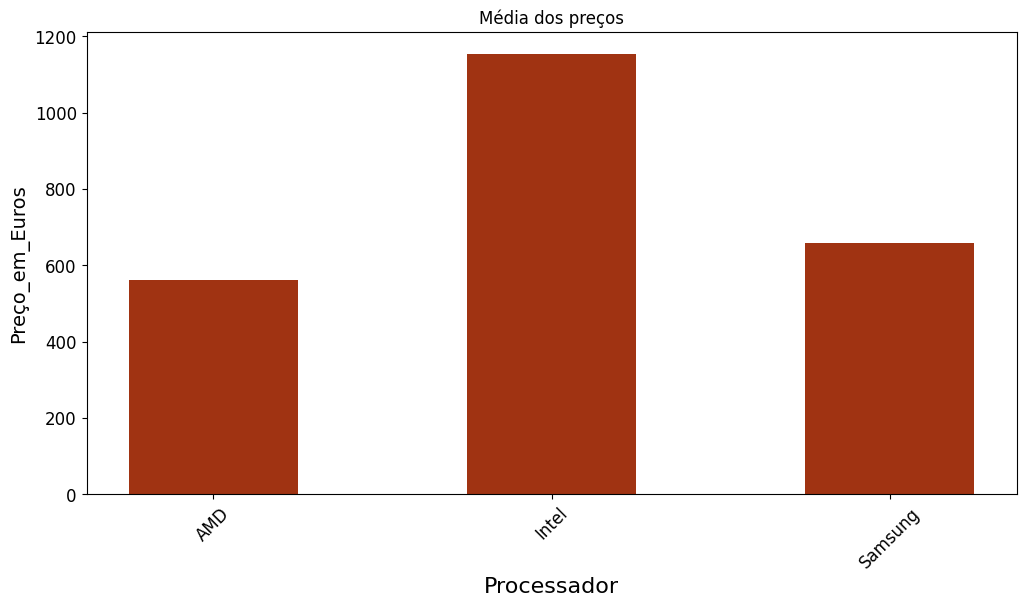

In [14]:
data = laptop_price.groupby(by = "cpu_manufacturer", as_index = False)["price_euros"].mean()
make_bar_plot(data, "cpu_manufacturer", "price_euros", "Processador", "Preço_em_Euros", 45)

##### Preço por gpu

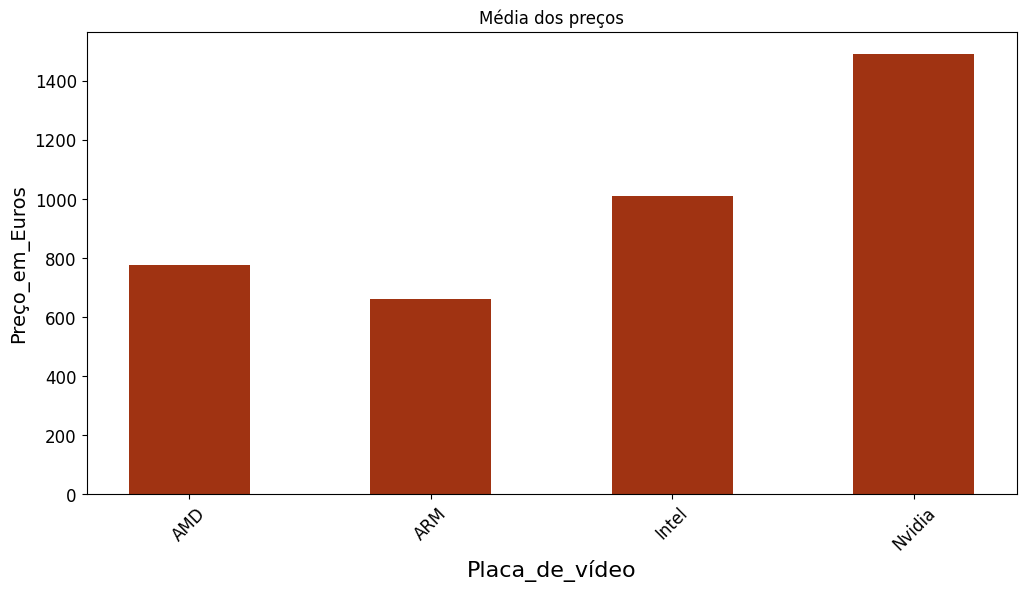

In [15]:
data = laptop_price.groupby(by = "gpu_manufacturer", as_index = False)["price_euros"].mean()
make_bar_plot(data, "gpu_manufacturer", "price_euros", "Placa_de_vídeo", "Preço_em_Euros", 45)

#### Resolução de tela (em pixels)

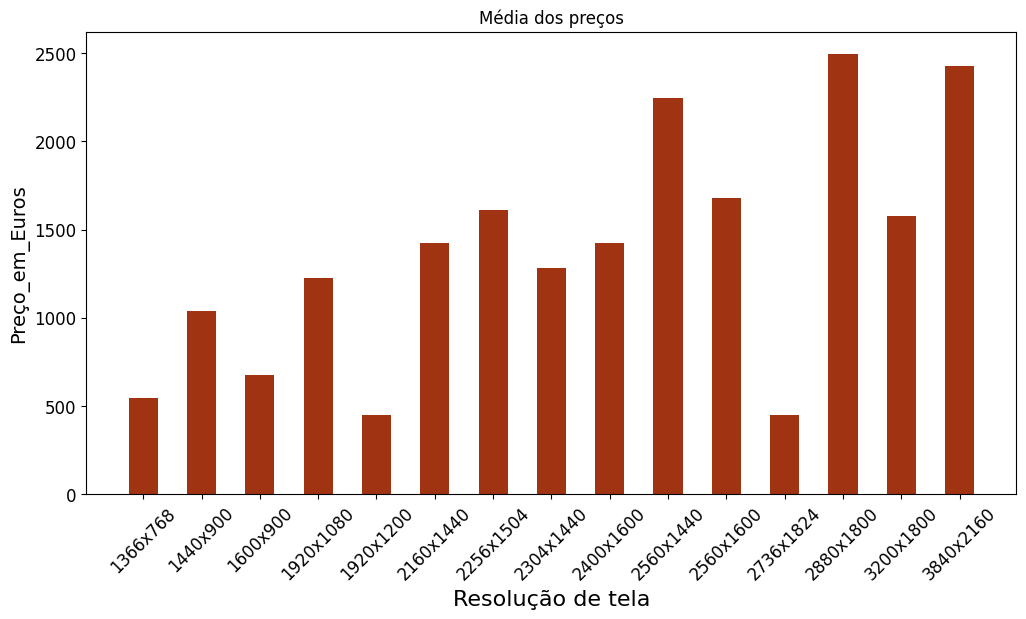

In [16]:
data = laptop_price.groupby(by = "screen_resolution", as_index = False)["price_euros"].mean()
make_bar_plot(data, "screen_resolution", "price_euros", "Resolução de tela", "Preço_em_Euros", 45)

### BoxPlot

In [27]:
def make_box_plot(data_frame:any, x_arg: any, y_arg: any, title = "Sem título", rotate = 90) -> None:
    figure, axis = plt.subplots(figsize = (12, 6))
    sns.boxplot(
        data = data_frame,
        x = x_arg,
        y = y_arg,
        ax = axis
    )
    plt.title(title)
    plt.xticks(rotation = rotate)
    plt.show()

##### Preço por marca

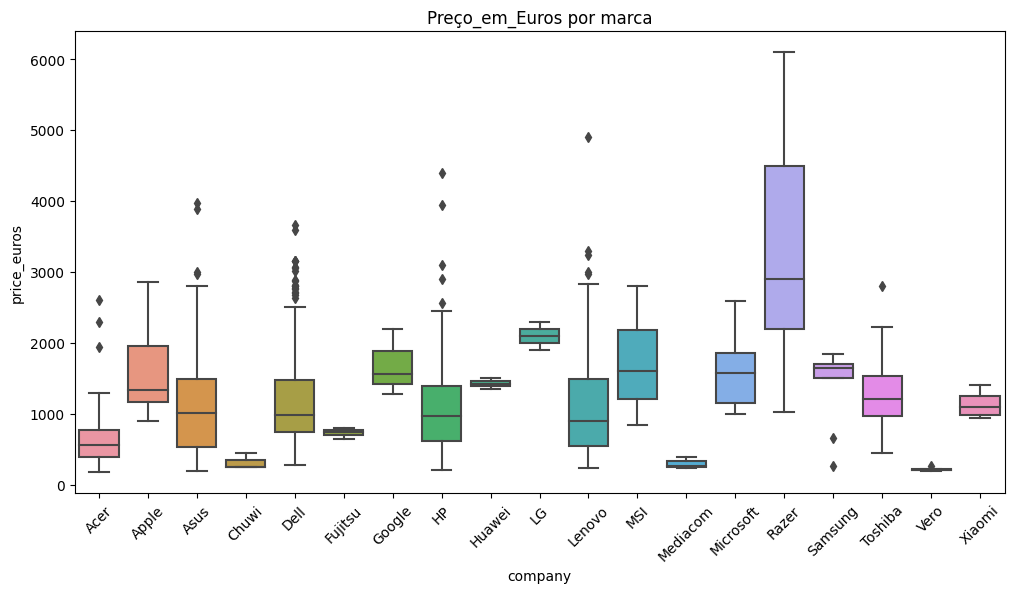

In [29]:
make_box_plot(data_frame = laptop_price, y_arg = "price_euros", x_arg = "company", title = "Preço_em_Euros por marca", rotate = 45)

##### Preço por cpu

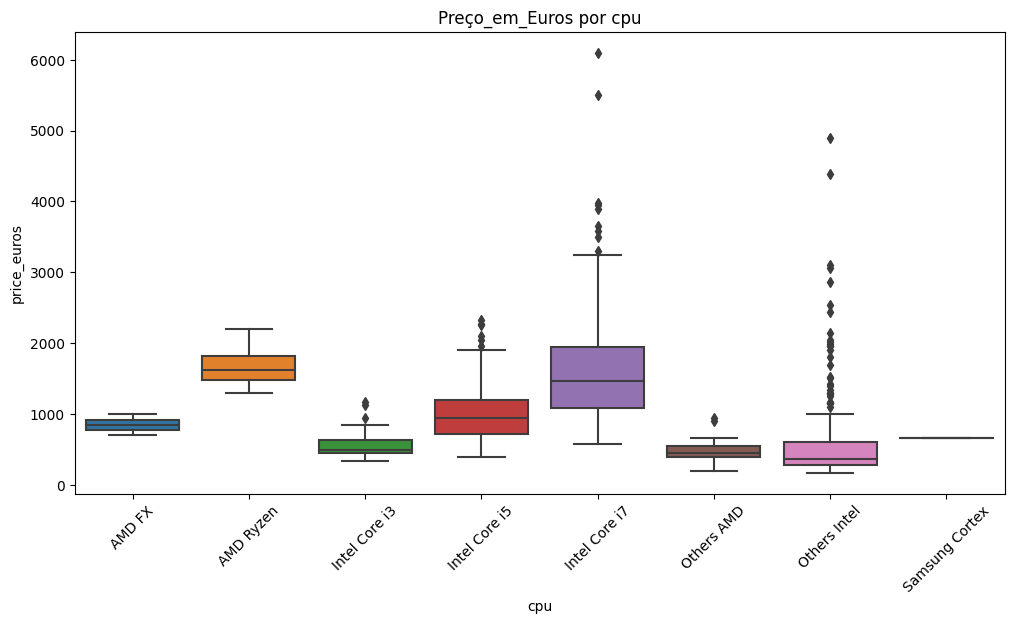

In [30]:
make_box_plot(data_frame = laptop_price, y_arg = "price_euros", x_arg = "cpu", title = "Preço_em_Euros por cpu", rotate = 45)

##### Preço por gpu

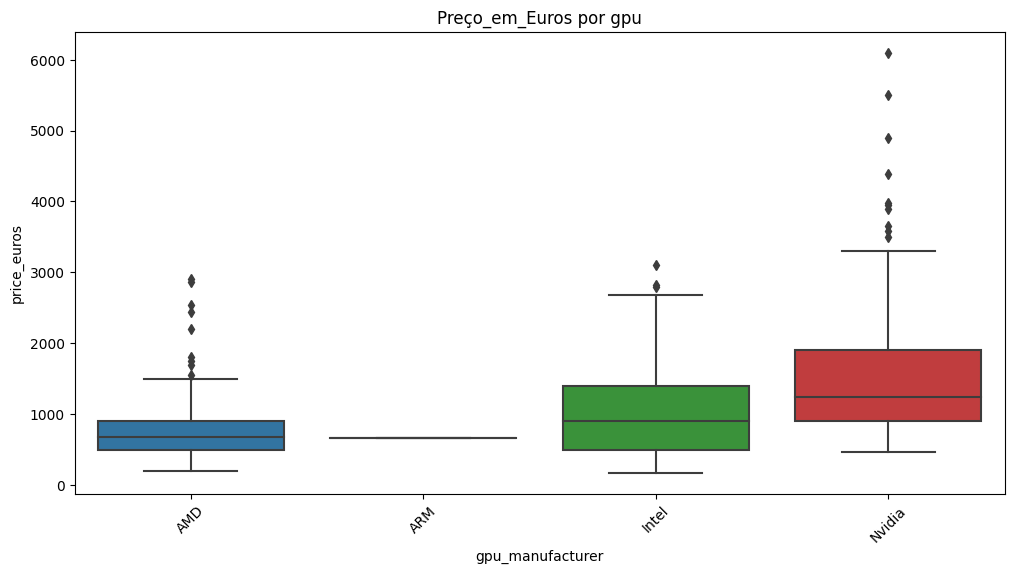

In [47]:
make_box_plot(data_frame = laptop_price, y_arg = "price_euros", x_arg = "gpu_manufacturer", title = "Preço_em_Euros por gpu", rotate = 45)

#### Preço por resolução de tela (em pixels)

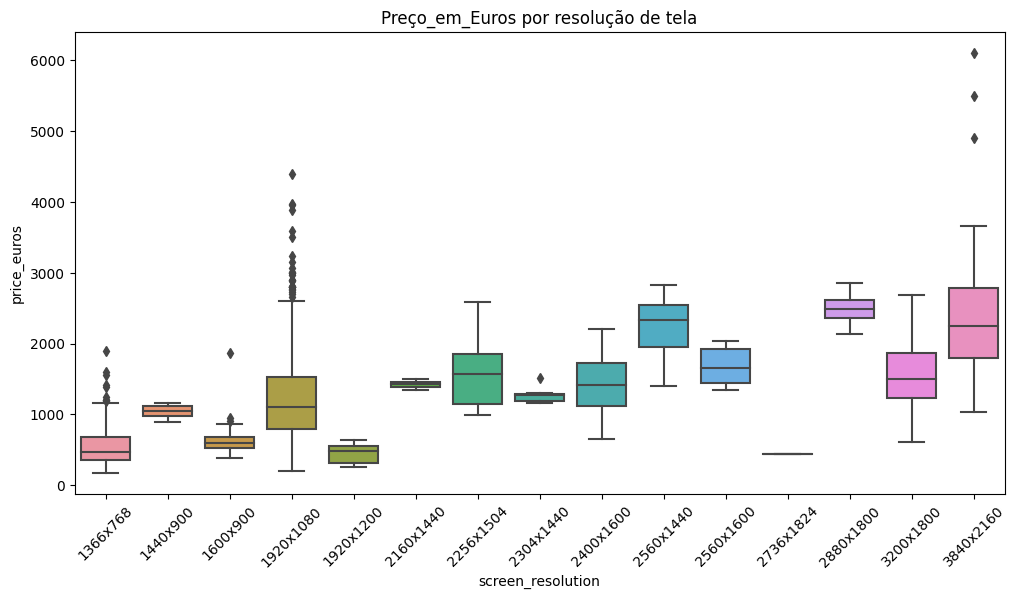

In [48]:
make_box_plot(data_frame = laptop_price, y_arg = "price_euros", x_arg = "screen_resolution", title = "Preço_em_Euros por resolução de tela", rotate = 45)

### Pie

In [ ]:
def make_pie_plot(data: any, x_axis: any, labels: any, title = "Sem título", rotation = 45, angle = 90) -> None:
    figure = plt.figure(figsize = (12, 6))
    plt.pie(
        x = x_axis,
        labels = labels,
        autopct = "%1.2f%%",
        startangle = angle,
        data = data
    )
    plt.xticks(rotation = rotation, size = 12)
    plt.yticks(size = 12)
    plt.title("Média dos preços")
    plt.show()

### Heatmap

In [52]:
def make_heatmap(data: any, rotation = 90) -> None:
    figure = plt.figure(figsize = (12, 6))
    sns.heatmap(data = data)
    plt.xticks(rotation = rotation)
    plt.show()

#### Correlação das variáveis

/tmp/ipykernel_18866/350859861.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  to_heatmap = laptop_price.corr()


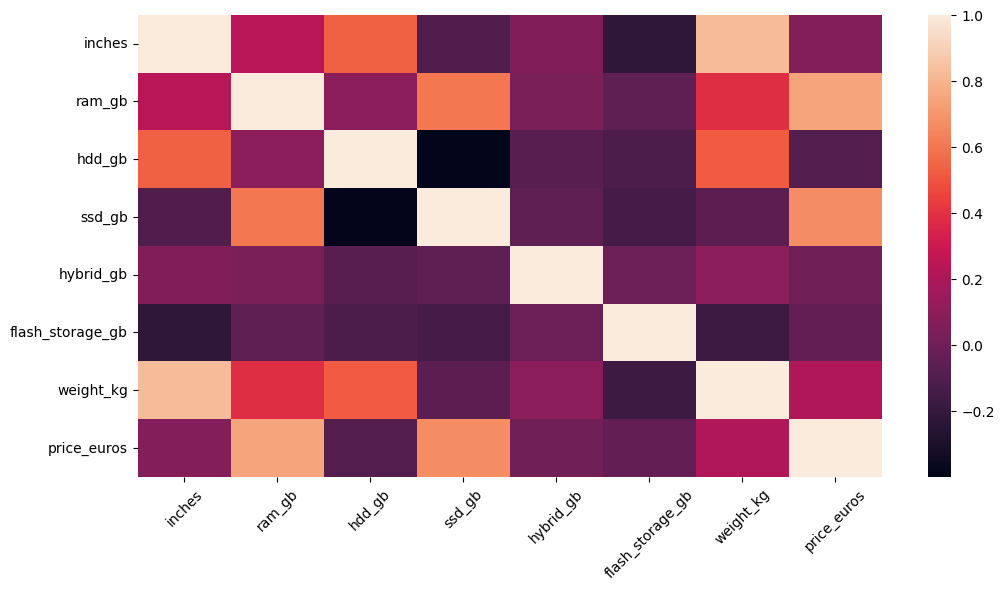

In [53]:
to_heatmap = laptop_price.corr()
make_heatmap(data = to_heatmap, rotation = 45)